In [1]:
# Iris Flower Dataset

# What is EDA?
# Data-point/vector/Observation
# Data-set.
# Feature/Variable/Input-variable/Dependent-varibale
# Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
# Vector: 2-D, 3-D, 4-D,.... n-D
# Q. What is a 1-D vector: Scalar

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [3]:
# load dataset
iris = pd.read_csv('IRIS_flower.csv')

In [4]:
print(iris.shape)

(150, 5)


In [5]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
#(Q) How many data points for each class are present?
#(or) How many flowers for each species are present?

iris['species'].value_counts()

#balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


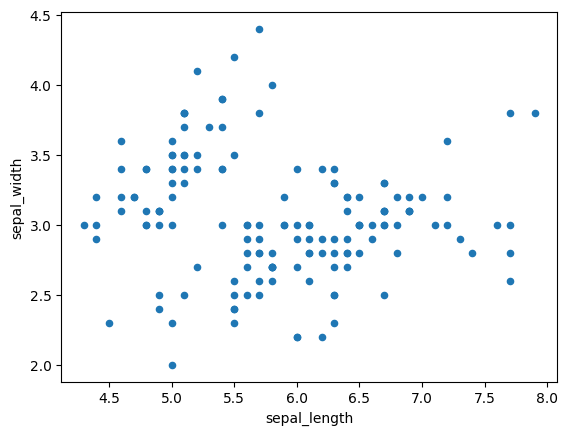

In [7]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

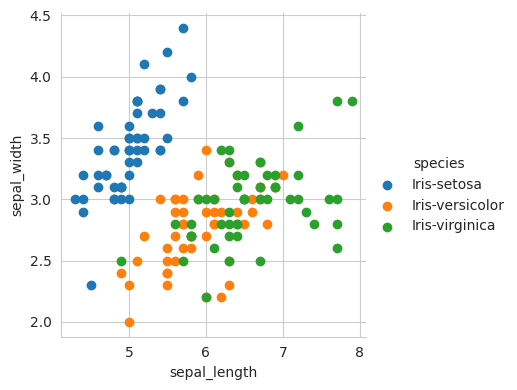

In [8]:
#2-D Scatter plot with color-coding for each flower type/class.
#Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");

sns.FacetGrid(iris, hue="species", height=4) \
  .map(plt.scatter, "sepal_length", "sepal_width") \
  .add_legend()
plt.show()

#Notice that the blue points can be easily seperated
# from red and green by drawing a line.
#But red and green data points cannot be easily seperated.
#Can we draw multiple 2-D scatter plots for each combination of features?
#How many cobinations exist? 4C2 = 6.

In [9]:
# by seeing to this graph we can say that it is linealy separable

In [10]:
# 3-D scatter plot

In [11]:
# pair plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


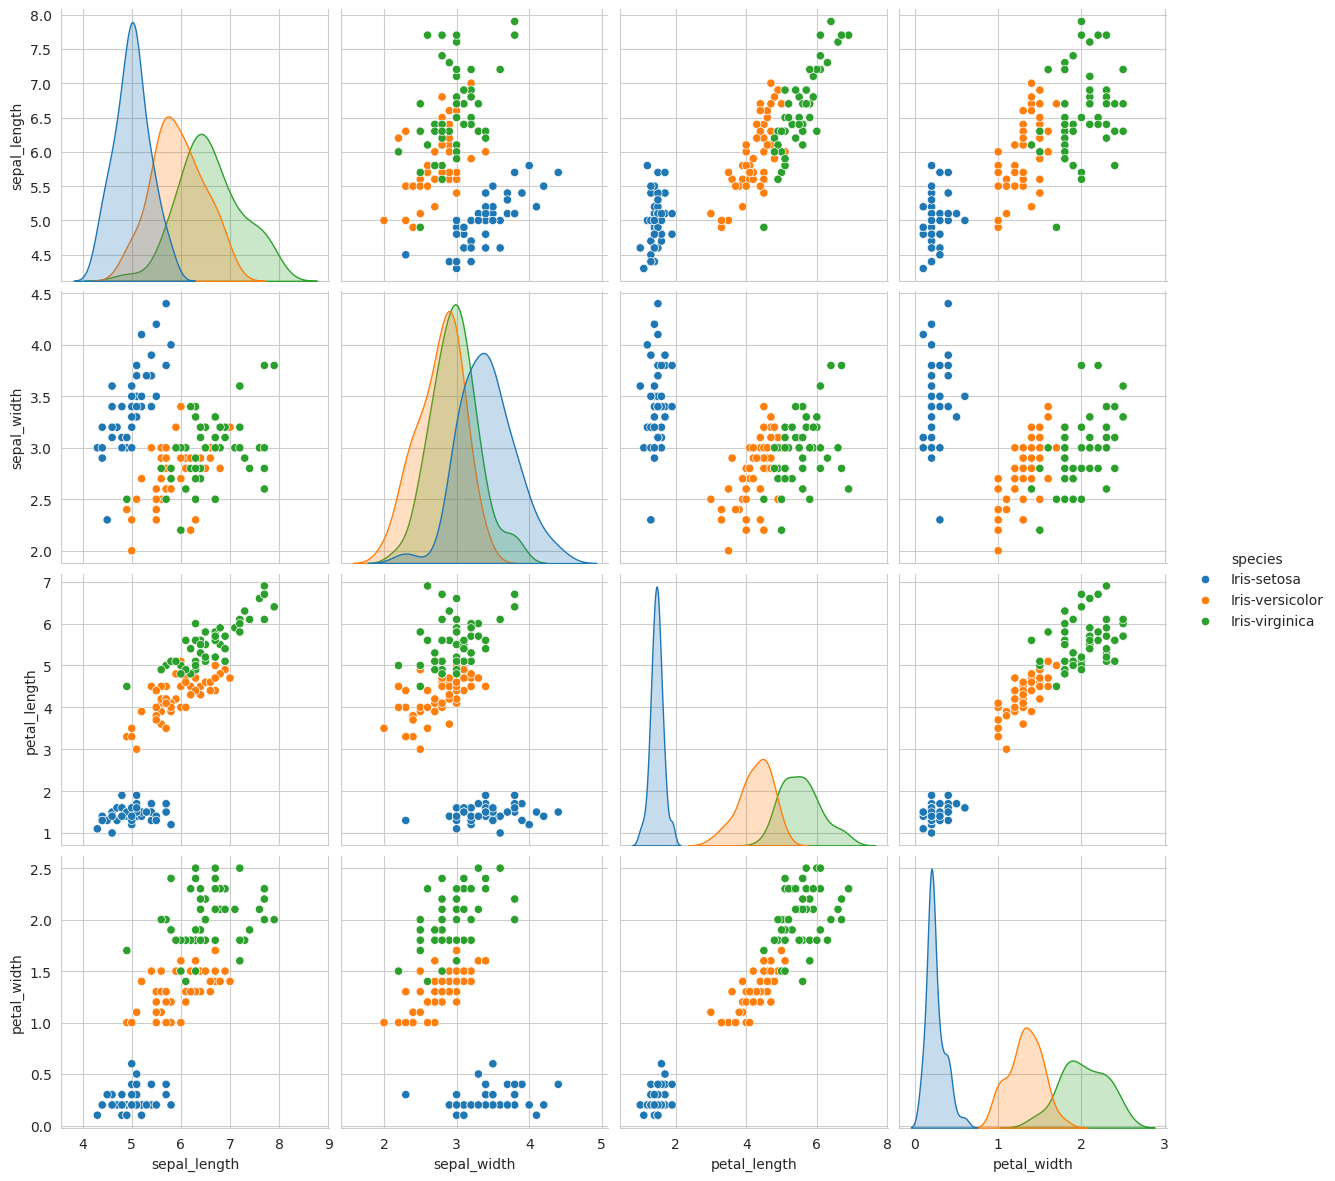

In [12]:
# pairwise scatter plot: Pair-Plot (here we have sepal lenght, sepal width,petal length,petal width) pairs forms will be 4C2
# visualize this as matrix like and ignore diagoanl elements for now (1,2) is sepal length and sepal width and so on
#Dis-advantages:
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3, diag_kind="kde");
plt.show()
#NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined
# https://plotly.com/

In [13]:
# pariplots are good when the dimensions are less but when the dimensions are more than 6 or 7 it is very difficult to handel it for that we have PCA and other dimension reduction algorithms

In [14]:
# 1D pair plot:- are very hard to read

In [15]:
# Load the iris dataset into a pandas DataFrame
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['species'] = iris_dataset.target
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [16]:
# 1-D scatter plot of petal-length
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]
iris_virginica = iris.loc[iris["species"] == "virginica"]

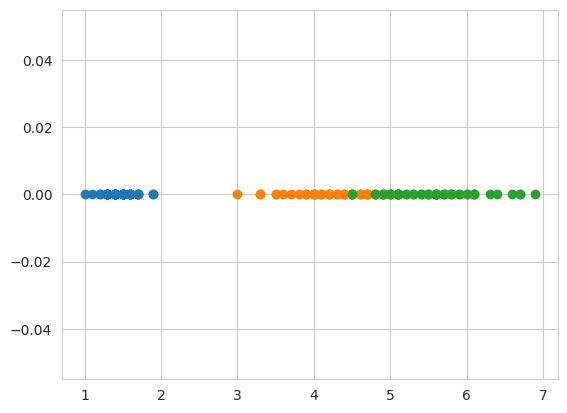

In [17]:
plt.plot(iris_setosa["petal length (cm)"], np.zeros_like(iris_setosa["petal length (cm)"]), 'o', label="Setosa")
plt.plot(iris_versicolor["petal length (cm)"], np.zeros_like(iris_versicolor["petal length (cm)"]), 'o', label="Versicolor")
plt.plot(iris_virginica["petal length (cm)"], np.zeros_like(iris_virginica["petal length (cm)"]), 'o', label="Virginica")

/tmp/ipython-input-18-1225107612.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


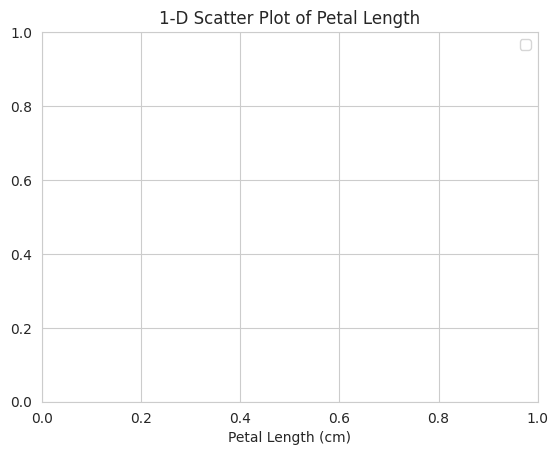

In [18]:
plt.xlabel("Petal Length (cm)")
plt.title("1-D Scatter Plot of Petal Length")
plt.legend()

plt.show()

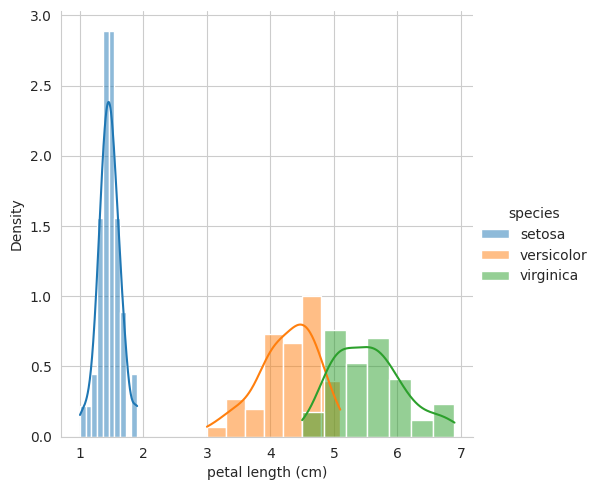

In [19]:
# as above we can not say how many points are there in the given interval, so to get that we use histogram
# and those lines are probability distribution fucntion
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "petal length (cm)", kde=True, stat="density") \
   .add_legend()

plt.show()

In [20]:
# smooth lines are call PDF(Probability Distribution Functions) i.e PDF is smooth histogram

In [21]:
# so if we want to build a model using petal length (PL) we can do like if PL is less than 2 then setosa and for other
# two i can do like in else, if PL >2 and less than 4.7 then versicolor else virginica
# here we have taken 4.7 because intersection of orange and green line because if PL > 4.7 then there is high chance of virginaca than versicolor

In [22]:
# univariate analysis:- suppose for the flowers we have sepal length, sepal width, petal length, petal width, so which variable is more
# useful to identify the flower that we can do with univariate analysis
# so more well separated it is more better it is, so that is we have to find using univariate analysis

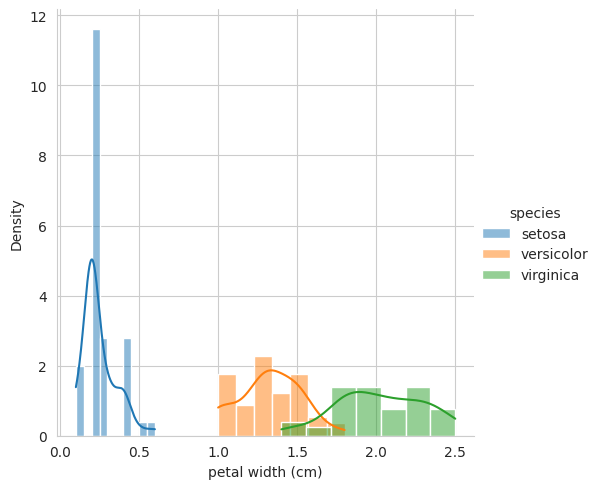

In [23]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "petal width (cm)", kde=True, stat="density") \
   .add_legend()

plt.show()

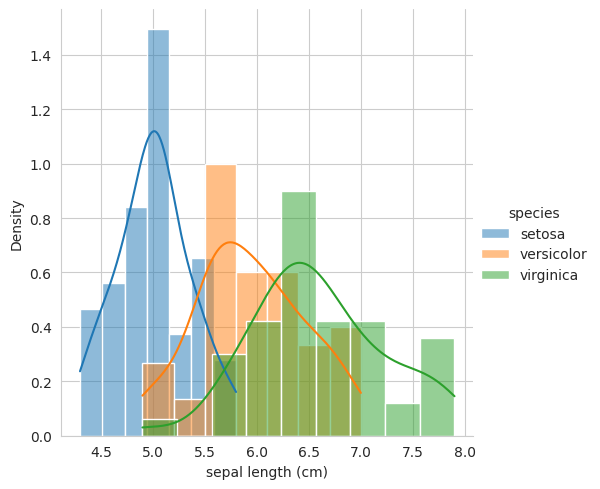

In [24]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "sepal length (cm)", kde=True, stat="density") \
   .add_legend()

plt.show()

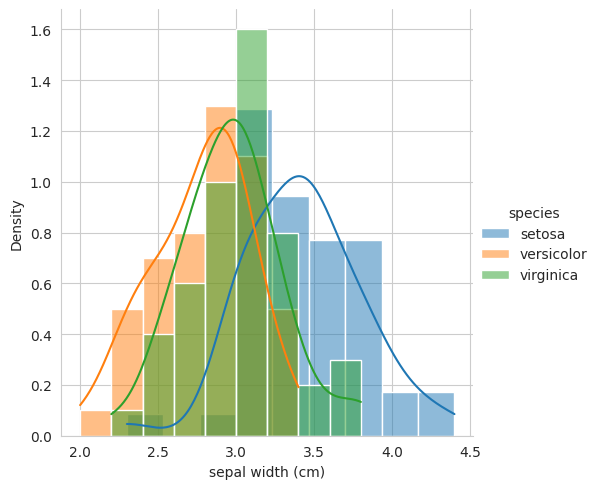

In [25]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.histplot, "sepal width (cm)", kde=True, stat="density") \
   .add_legend()

plt.show()

In [26]:
# so we can say that PL>PW>SL>SW

In [27]:
# cumulative distribution function (CDF) used in EDA to understand the distribution and behavior of data
# if differenciate CDF we get pdf and if we integrate PDF we get CDF

In [28]:
# Assuming iris_setosa is a DataFrame already defined and loaded
counts, bin_edges = np.histogram(iris_setosa['petal length (cm)'], bins=10, density=True)

In [29]:
pdf = counts / sum(counts)
print("PDF:", pdf)
print("Bin edges:", bin_edges)

PDF: [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
Bin edges: [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [30]:
# Compute CDF
cdf = np.cumsum(pdf)

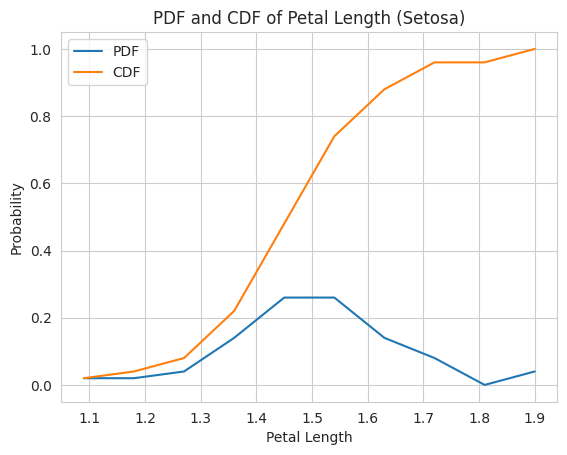

In [31]:
# Plot PDF and CDF
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('Petal Length')
plt.ylabel('Probability')
plt.title('PDF and CDF of Petal Length (Setosa)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# so here if we want to see for petal length 1.6 we can say that around 82% plat leaves are having petal length less than 1.6 cm
# just check straight line of 1.6 and intersection of orange line

In [33]:
# Optional: for better aesthetics
sns.set(style="whitegrid")

# Define a function to compute and plot PDF and CDF
def plot_pdf_cdf(data, label, color):
    counts, bin_edges = np.histogram(data, bins=10, density=True)
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, label=f'PDF - {label}', linestyle='--', color=color)
    plt.plot(bin_edges[1:], cdf, label=f'CDF - {label}', linestyle='-', color=color)

# Assuming iris_setosa, iris_versicolor, iris_virginica are DataFrames already defined

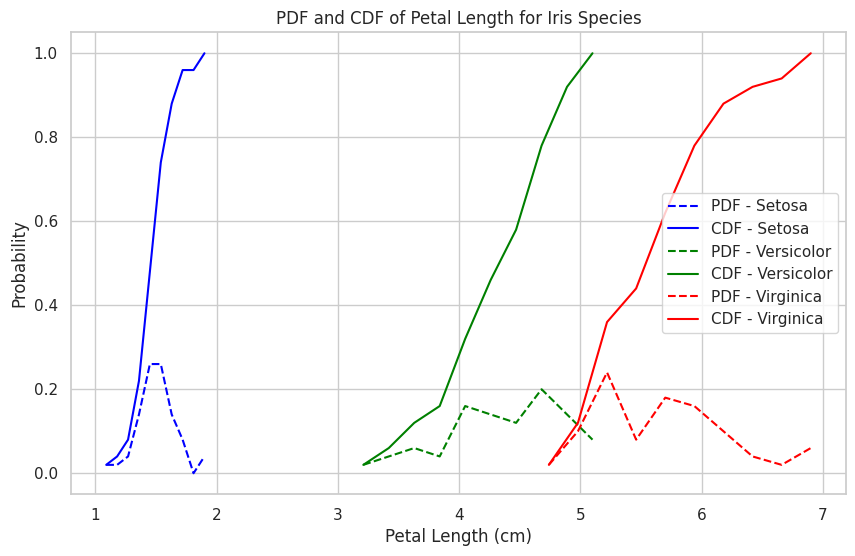

In [34]:
# Plot all three
plt.figure(figsize=(10, 6))

plot_pdf_cdf(iris_setosa['petal length (cm)'], 'Setosa', 'blue')
plot_pdf_cdf(iris_versicolor['petal length (cm)'], 'Versicolor', 'green')
plot_pdf_cdf(iris_virginica['petal length (cm)'], 'Virginica', 'red')

# Add legend, labels, title, and grid
plt.legend()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.title('PDF and CDF of Petal Length for Iris Species')
plt.grid(True)
plt.show()

In [35]:
# gives ~100% accurate prediction for setosa
# gives ~95% accurate prediction for Versicolor.
# gives ~90% accurate prediction for Virginica, but with a slightly higher error

In [36]:
# Means :- central value of a dataset — it tells you where the "center" of the data lies.
print("Means:")
print("Setosa:", np.mean(iris_setosa["petal length (cm)"]))
print("Setosa with outlier (50):", np.mean(np.append(iris_setosa["petal length (cm)"], 50)))
print("Virginica:", np.mean(iris_virginica["petal length (cm)"]))
print("Versicolor:", np.mean(iris_versicolor["petal length (cm)"]))

Means:
Setosa: 1.4620000000000002
Setosa with outlier (50): 2.4137254901960787
Virginica: 5.5520000000000005
Versicolor: 4.26


In [37]:
# Variance :- measures how spread out the numbers in your dataset are from the mean.
print("\nVariance:")
print("Setosa:", np.var(iris_setosa["petal length (cm)"]))
print("Virginica:", np.var(iris_virginica["petal length (cm)"]))
print("Versicolor:", np.var(iris_versicolor["petal length (cm)"]))


Variance:
Setosa: 0.02955600000000001
Virginica: 0.2984960000000002
Versicolor: 0.21640000000000012


In [38]:
# Standard Deviations :- square root of the variance. It tells you how much values typically deviate from the mean.
print("\nStandard Deviations:")
print("Setosa:", np.std(iris_setosa["petal length (cm)"]))
print("Virginica:", np.std(iris_virginica["petal length (cm)"]))
print("Versicolor:", np.std(iris_versicolor["petal length (cm)"]))


Standard Deviations:
Setosa: 0.17191858538273286
Virginica: 0.5463478745268441
Versicolor: 0.4651881339845204


In [39]:
# what outlier means is mean length of setosa is 1.46 and if someone entered new oberservation and by mistake it made length as 50 so
# as it is very very far from mean it point is called as outlier

In [40]:
# Median: Middle value of sorted data
# The middle value of a sorted dataset. Less sensitive to outliers than the mean.
print("\nMedians:")
print("Setosa:", np.median(iris_setosa["petal length (cm)"]))
print("Setosa with outlier (50):", np.median(np.append(iris_setosa["petal length (cm)"], 50)))
print("Virginica:", np.median(iris_virginica["petal length (cm)"]))
print("Versicolor:", np.median(iris_versicolor["petal length (cm)"]))


Medians:
Setosa: 1.5
Setosa with outlier (50): 1.5
Virginica: 5.55
Versicolor: 4.35


In [41]:
# Quantiles: Data values at certain % points
# Same as percentiles, but expressed in fractions (0.25 quantile = 25th percentile).
print("\nQuantiles (0%, 25%, 50%, 75%):")
print("Setosa:", np.percentile(iris_setosa["petal length (cm)"], [0, 25, 50, 75]))
print("Virginica:", np.percentile(iris_virginica["petal length (cm)"], [0, 25, 50, 75]))
print("Versicolor:", np.percentile(iris_versicolor["petal length (cm)"], [0, 25, 50, 75]))


Quantiles (0%, 25%, 50%, 75%):
Setosa: [1.    1.4   1.5   1.575]
Virginica: [4.5   5.1   5.55  5.875]
Versicolor: [3.   4.   4.35 4.6 ]


In [42]:
# 90th Percentile
# Value below which a given % of data falls (e.g., 90th percentile = 90% of values are lower).
print("\n90th Percentile:")
print("Setosa:", np.percentile(iris_setosa["petal length (cm)"], 90))
print("Virginica:", np.percentile(iris_virginica["petal length (cm)"], 90))
print("Versicolor:", np.percentile(iris_versicolor["petal length (cm)"], 90))


90th Percentile:
Setosa: 1.7
Virginica: 6.31
Versicolor: 4.8


In [43]:
# IQR: Interquartile Range (Q3 - Q1)
# Interquartile Range = Q3 - Q1 (75th percentile - 25th percentile), shows middle spread.
print("\nIQR (Interquartile Range):")
def iqr(data):
    return np.percentile(data, 75) - np.percentile(data, 25)

print("Setosa:", iqr(iris_setosa["petal length (cm)"]))
print("Virginica:", iqr(iris_virginica["petal length (cm)"]))
print("Versicolor:", iqr(iris_versicolor["petal length (cm)"]))


IQR (Interquartile Range):
Setosa: 0.17500000000000027
Virginica: 0.7750000000000004
Versicolor: 0.5999999999999996


In [44]:
# MAD: Median Absolute Deviation
# Median Absolute Deviation: median of absolute differences from the median (robust to outliers).
print("\nMAD (Median Absolute Deviation):")
def mad(data):
    return np.median(np.abs(data - np.median(data)))

print("Setosa:", mad(iris_setosa["petal length (cm)"]))
print("Virginica:", mad(iris_virginica["petal length (cm)"]))
print("Versicolor:", mad(iris_versicolor["petal length (cm)"]))


MAD (Median Absolute Deviation):
Setosa: 0.10000000000000009
Virginica: 0.4500000000000002
Versicolor: 0.34999999999999964


In [47]:
# histograms are very good to understand the density of how many points exists where it can not still answer the percentile values for
# we use box plots

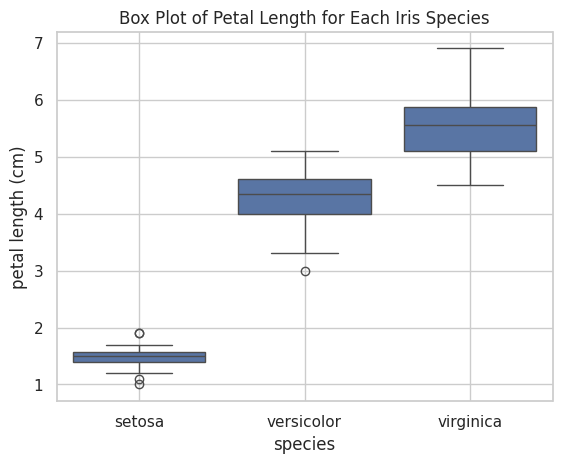

In [46]:
# Box Plots and Whiskers

# Box Plot with Whiskers: Visualizing 1D scatter with distribution summary

# The concept of median, percentiles, and quantiles is central to a box plot.

# 🔹 How is the box drawn?
#   - The box represents the Interquartile Range (IQR): from Q1 (25th percentile) to Q3 (75th percentile).
#   - The line inside the box is the median (50th percentile).

# 🔹 How are the whiskers drawn?
#   - There's no single standard method.
#   - Common approach: whiskers extend to 1.5 * IQR beyond Q1 and Q3.
#   - Points outside the whiskers are considered outliers (plotted as dots).
#   - Note: whiskers **do not necessarily represent min and max** values.

# 🔹 A box plot can be interpreted like a sideways view of a PDF.

# Plotting the box plot for petal length across species
sns.boxplot(x='species', y='petal length (cm)', data=iris)
plt.title("Box Plot of Petal Length for Each Iris Species")
plt.grid(True)
plt.show()

In [48]:
# How to Read a Box Plot
# For each species:
# Middle line inside the box = Median (Q2)

#Bottom of the box = 25th percentile (Q1)

# Top of the box = 75th percentile (Q3)

# Box height (Q3 - Q1) = Interquartile Range (IQR)

# Whiskers = values within 1.5 × IQR from Q1 and Q3

# Circles (○) = Outliers beyond the whiskers

In [49]:
# 🧠 Species-wise Interpretation:
# 1. Setosa:
# Petal lengths are very tightly packed (low spread).

# Median ≈ 1.5 cm

# Very small IQR: most values between ≈ 1.3 and 1.6 cm

# A few outliers below 1.2 and above 1.8 cm

# Least variation among all species

# 2. Versicolor:
# Median ≈ 4.35 cm

# IQR is wider: Q1 ≈ 4.0, Q3 ≈ 4.8

# Some outliers just below 3.0 cm

# More spread than setosa → indicates greater variation

# 3. Virginica:
# Median ≈ 5.6 cm

# IQR from ≈ 5.1 to 6.3

# Whiskers go from ≈ 4.5 to 7.0

# No visible outliers → data is well-contained within 1.5 × IQR

In [50]:
# violin plots

# A violin plot combines the benefits of a box plot and KDE (distribution)
# - It shows the distribution shape like a sideways density plot (KDE)
# - Denser regions of the data appear wider ("fatter"), sparse areas are thinner
# - Also shows median and interquartile range (like a box plot)

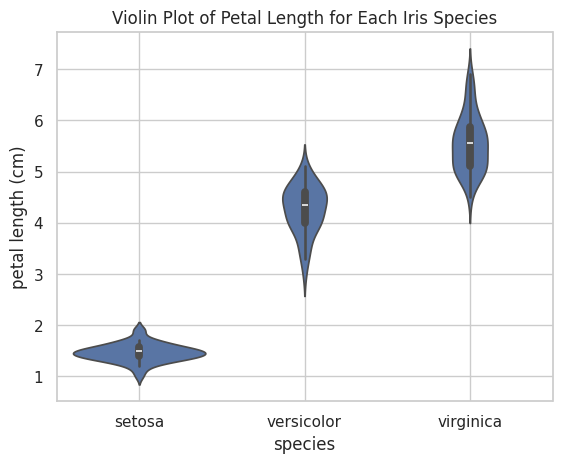

In [54]:
sns.violinplot(x="species", y="petal length (cm)", data=iris)
plt.title("Violin Plot of Petal Length for Each Iris Species")
plt.grid(True)
plt.show()

In [55]:
# 🔍 What a Violin Plot Shows:
# A violin plot combines features of a box plot and a KDE (Kernel Density Estimate) plot:

# Width of the "violin" at each height (y-axis) shows how many data points are at that value (the density).

# White dot = Median (50th percentile).

# Thick black bar = Interquartile Range (IQR) (25th to 75th percentile).

# Thin black line = Full data range (excluding outliers, if any).

# 📊 Interpretation by Species:
# 🔹 Setosa
# Petal lengths are very short and tightly grouped.

# The distribution is narrow and symmetric, centered around ~1.5 cm.

# Almost all petals are in the 1.3–1.6 cm range.

# Very low variance, indicating strong clustering.

# 🔹 Versicolor
# Petal length is more spread out.

# Median is around ~4.4 cm.

# Wider violin shape shows more variation in petal lengths.

# The shape is fairly symmetrical but with slightly more density around 4.5 cm.

# 🔹 Virginica
# Highest petal lengths, ranging from ~4.5 to ~7 cm.

# Median is around ~5.5 cm.

# The violin is a bit asymmetric, possibly right-skewed.

# Distribution is more spread, indicating higher variance.

# ✅ Key Takeaways:
# Setosa has very small and consistent petal lengths — easy to classify.

# Versicolor and Virginica overlap a bit but are more spread out.

# Violin plots are great for showing both summary statistics and distribution shape.

In [56]:
#multivariate probability density, contour probability density plot

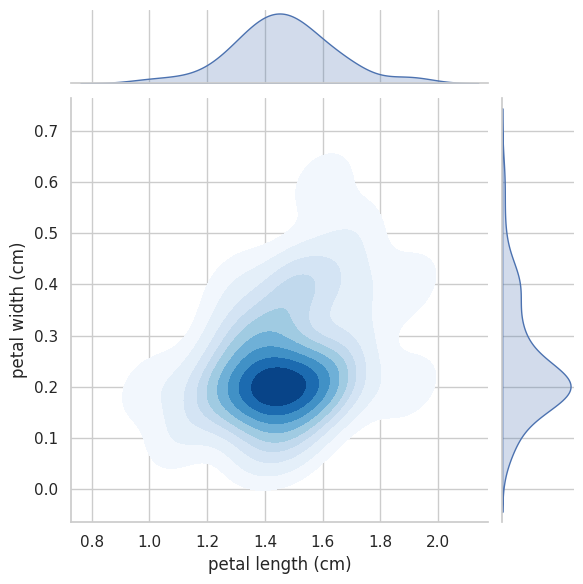

In [59]:
# 2D Density plot (KDE contours) for petal_length vs petal_width of Setosa
sns.jointplot(x="petal length (cm)",
              y="petal width (cm)",
              data=iris_setosa,
              kind="kde",
              fill=True,  # Optional: fills the contours
              cmap="Blues")  # Optional: set a color map
plt.show()

In [60]:
# 1d density plot - pdf
# 2d density plot - contour plot